In [16]:
from perceptron import Perceptron
import numpy as np

## Dataset

In [17]:
features = np.array([
    # Cough, Fever, Difficulty breathing, Tiredness
    [0, 1, 1, 1],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])
labels = np.array([1]*4 + [0]*4)  # 1 - sick, 0 - healthy


## Own perceptron

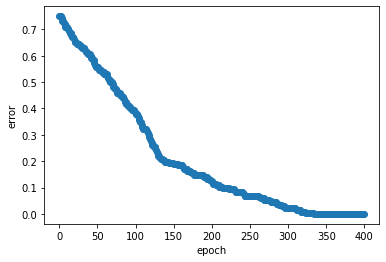

In [18]:
p = Perceptron([1] * len(features[0]), 0)
p.train(features, labels, draw=False, epochs=400)

## Turicreate

In [19]:
import turicreate as tc

In [20]:
datadict = {
    'cough': features[:, 0],
    'fever': features[:, 1],
    'difficulty_breathing': features[:, 2],
    'tiredness': features[:, 3],
    'prediction': labels,
}
data = tc.SFrame(datadict)
data


cough,difficulty_breathing,fever,prediction,tiredness
0,1,1,1,1
1,0,1,1,1
1,1,0,1,1
1,1,1,1,0
1,0,0,0,1
0,1,1,0,0
0,0,1,0,0
0,0,0,0,1


In [21]:
perceptron = tc.logistic_classifier.create(data, target='prediction')
perceptron.coefficients

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients      : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.000776     | 1.000000          |

| 2         | 3        | 0.001529     | 1.000000          |

| 3         | 4        | 0.002149     | 1.000000          |

| 4         | 5        | 0.002968     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

name,index,class,value,stderr
(intercept),None,1,-11.68717502591213,7.722619773254975
cough,None,1,4.907861390055092,4.408976797438604
difficulty_breathing,None,1,4.907861390055091,4.408976797438606
fever,None,1,4.7437257323026545,4.344994969191999
tiredness,None,1,4.7437257323026545,4.344994969192003


## Exercise 5.2

In [22]:
p = [1, 1]
perceptron = Perceptron([2, 3], -4)

### a.

$$ 2*1 + 3*1 - 4 = 0 $$
$$ 5 - 4 = 0 $$
$$ 1 = 0$$

In [23]:
perceptron.predict(p)

1

### b.

$$ err = abs(w_1*x_1 + w_2*x_2 + bias) $$
$$ err = abs(2 * 1 + 3 * 1 - 4)$$
$$ err = 1 $$

In [25]:
perceptron.error(p, 0)

1

### c., d.


In [30]:
perceptron.perceptron_trick(np.array(p), 0, 0.01)
print(perceptron)
print(perceptron.error(p, 0))

([1.96 2.96], -4.039999999999999)
0.8800000000000017


## Exercise 5.3


### a. AND

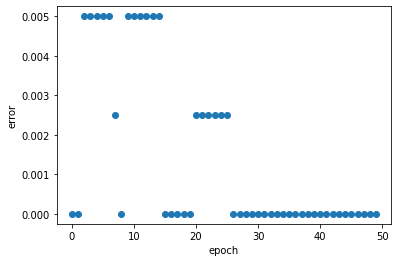

In [37]:
features = [
    [0.0, 0],
    [0.0, 1],
    [1.0, 0],
    [1.0, 1]
]
labels = [0.0, 0, 0, 1]
p = Perceptron(np.array([0.0, 0]), 0)
p.train(np.array(features), np.array(labels), draw=False, epochs=50)


### b. OR

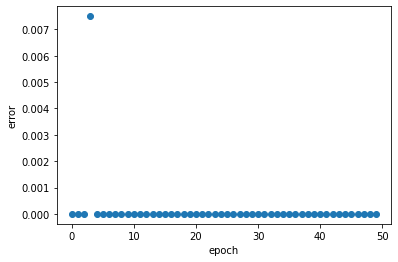

In [38]:
features = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
labels = [0, 1, 1, 1]
p = Perceptron(np.array([0.0, 0]), 0)
p.train(np.array(features), np.array(labels), draw=False, epochs=50)


### c. XOR

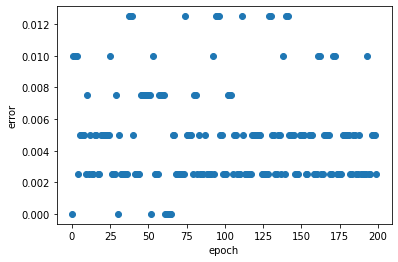

In [40]:
features = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
labels = [0, 1, 1, 0]
p = Perceptron(np.array([0.0, 0]), 0)
p.train(np.array(features), np.array(labels), draw=False, epochs=200)
